In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_parquet('clean.parquet')

### Splitting Output from Input Space

In [3]:
X = df.drop('Response', axis= 1) 
y = df['Response']

### Splitting Training and Test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

### Modelling

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [6]:
#changing parameters should be evaluated
clf = DecisionTreeClassifier(splitter='best', criterion='gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier()

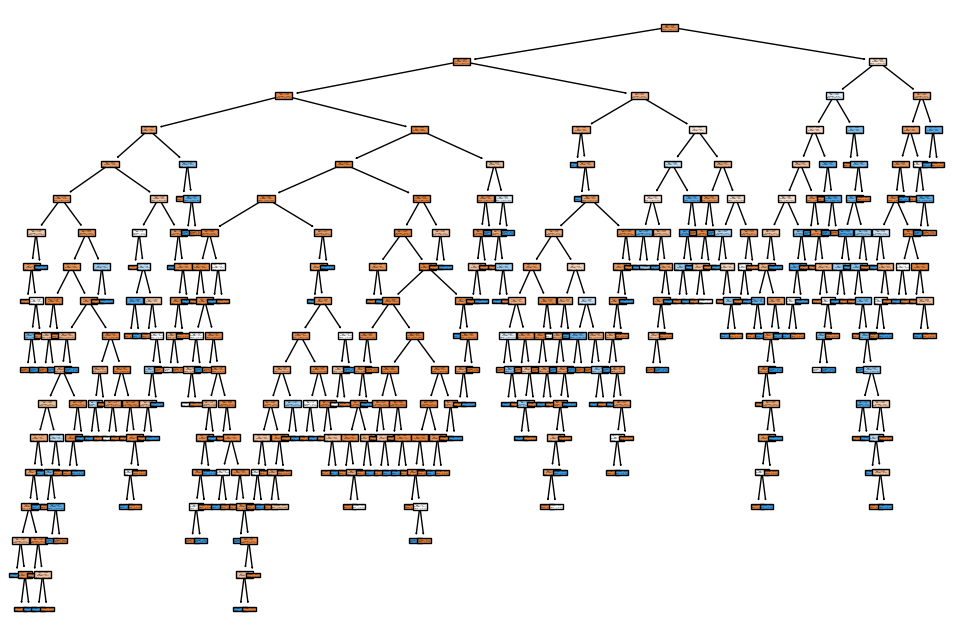

In [7]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, impurity=True, proportion=True)
plt.show()

In [8]:
y_preds = clf.predict(X_test)

### Evaluation

In [9]:
acc = accuracy_score(y_test, y_preds)
prec = precision_score(y_test, y_preds)
rec = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)
auc = roc_auc_score(y_test, y_preds)
cm = confusion_matrix(y_preds, y_test, labels=[1,0])
print(cm)

[[ 31  65]
 [ 33 316]]


In [10]:
print("Accuracy: %.4f" % acc)
print("Precision: %.4f" % prec)
print("Recall: %.4f" % rec)
print("F1: %.4f" % f1)
print("AUC: %.4f" % auc)

Accuracy: 0.7798
Precision: 0.3229
Recall: 0.4844
F1: 0.3875
AUC: 0.6569
